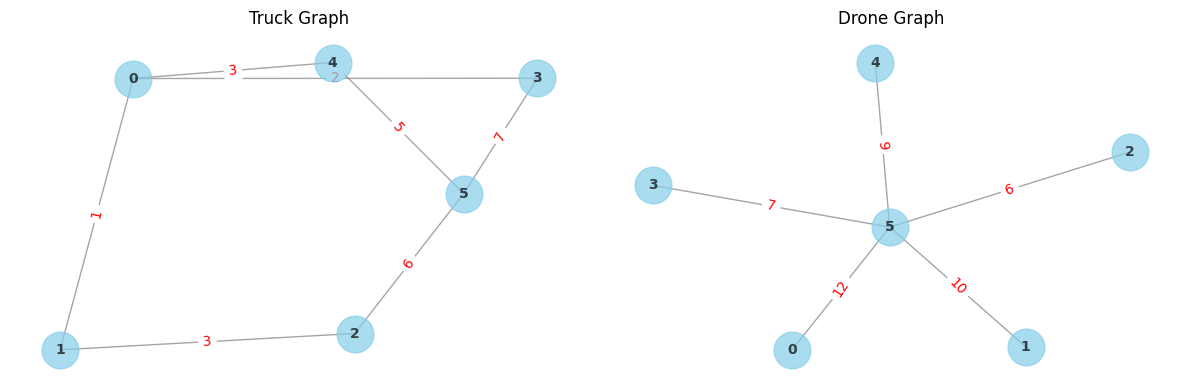

Total cost (Combined): 8
Minimum cost path (Combined): [0, 4, 5]
Path covered by truck in combined graph:
Edge: (0, 4), Weight (Truck): 3
Edge: (4, 5), Weight (Truck): 5
Path covered by drone in combined graph:


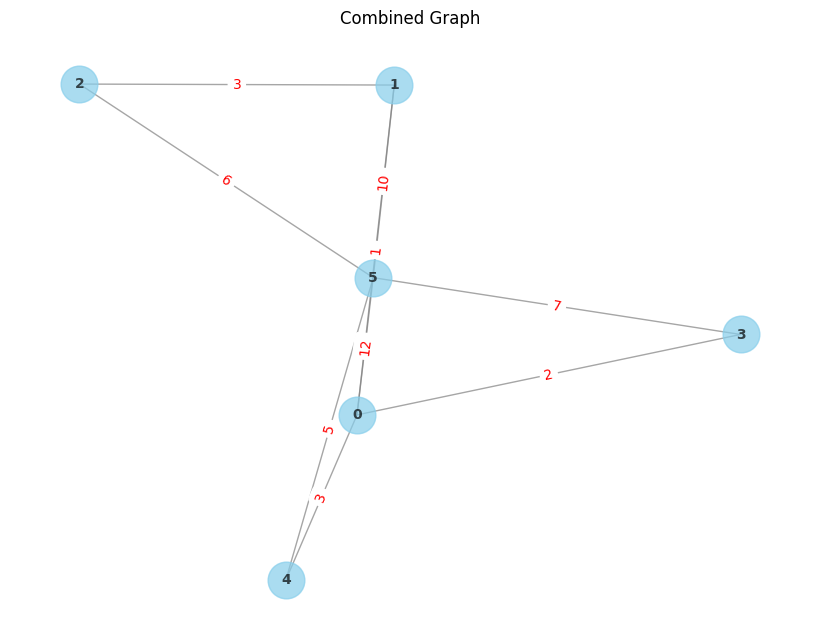

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
drone_path_edges = [(0, 5, 12), (4, 5, 9), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# Create truck graph
truck_G = nx.Graph()
truck_G.add_weighted_edges_from(truck_path_edges)

# Create drone graph
drone_G = nx.Graph()
drone_G.add_weighted_edges_from(drone_path_edges)

# Combine the graphs, resolving common edges with minimum weight
combined_G = nx.Graph()
for edge in set(truck_G.edges).union(drone_G.edges):
    if edge in truck_G.edges and edge in drone_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        min_weight = min(weight_truck, weight_drone)
        combined_G.add_edge(edge[0], edge[1], weight=min_weight)
    elif edge in truck_G.edges:
        combined_G.add_edge(edge[0], edge[1], weight=truck_G[edge[0]][edge[1]]['weight'])
    elif edge in drone_G.edges:
        combined_G.add_edge(edge[0], edge[1], weight=drone_G[edge[0]][edge[1]]['weight'])

# Plot individual truck graph
plt.figure(figsize=(12, 4))
plt.subplot(121)
pos_truck = nx.spring_layout(truck_G)
nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
plt.title("Truck Graph")

# Plot individual drone graph
plt.subplot(122)
pos_drone = nx.spring_layout(drone_G)
nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
plt.title("Drone Graph")

plt.tight_layout()
plt.show()

# Plot the combined graph
plt.figure(figsize=(8, 6))
pos_combined = nx.spring_layout(combined_G)
nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
plt.title("Combined Graph")

# Calculate the total cost of the combined graph
total_cost_combined = nx.shortest_path_length(combined_G, source=0, target=5, weight='weight')
print("Total cost (Combined):", total_cost_combined)

# Find and print the minimum cost path in the combined graph
min_cost_path_combined = nx.shortest_path(combined_G, source=0, target=5, weight='weight')
print("Minimum cost path (Combined):", min_cost_path_combined)

truck_path_combined = []
for i in range(len(min_cost_path_combined) - 1):
    edge = (min_cost_path_combined[i], min_cost_path_combined[i + 1])
    if edge in truck_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_truck == weight_combined:
            truck_path_combined.append((edge, weight_truck))

print("Path covered by truck in combined graph:")
for (edge, weight) in truck_path_combined:
    print(f"Edge: {edge}, Weight (Truck): {weight}")

drone_path_combined = []
for i in range(len(min_cost_path_combined) - 1):
    edge = (min_cost_path_combined[i], min_cost_path_combined[i + 1])
    if edge in drone_G.edges:
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_drone == weight_combined:
            drone_path_combined.append((edge, weight_drone))

print("Path covered by drone in combined graph:")
for (edge, weight) in drone_path_combined:
    print(f"Edge: {edge}, Weight (Drone): {weight}")

plt.show()

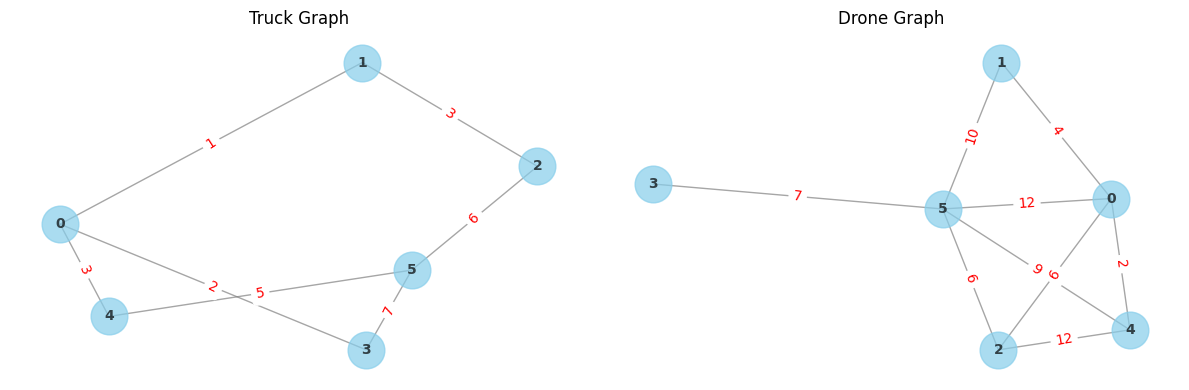

Total cost (Combined): 10
Minimum cost path (Combined 0->2): [0, 1, 2]
Minimum cost path (Combined 2->4): [2, 1, 0, 4]
Path covered by truck in combined graph:
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 1), Weight (Truck): 3
Edge: (1, 0), Weight (Truck): 1
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2


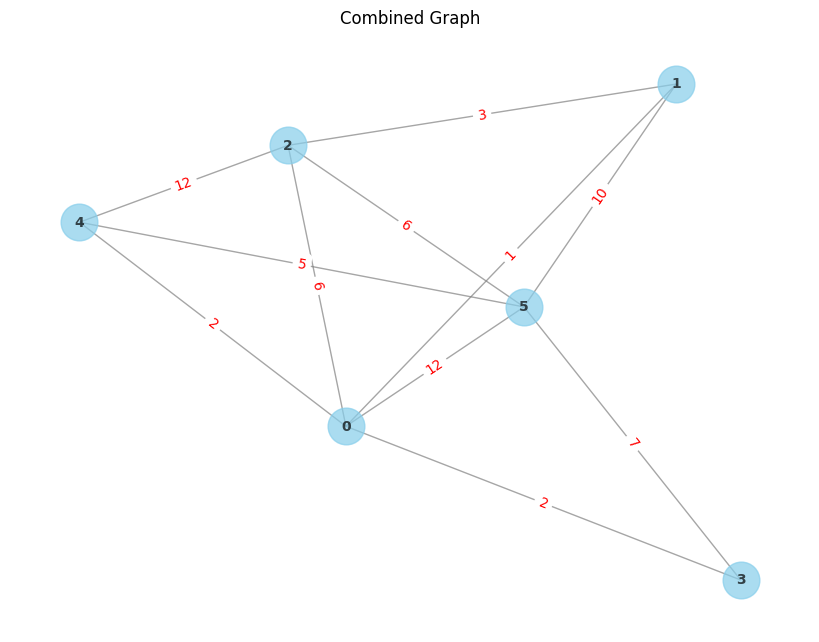

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges for each path considering multiple final destinations
truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
drone_path_edges = [(0, 5, 12), (4, 5, 9), (3, 5, 7), (1, 5, 10), (2, 5, 6),(0,4,2),(0,1,4),(2,4,12),(0,2,6)]

# Create truck graph
truck_G = nx.Graph()
truck_G.add_weighted_edges_from(truck_path_edges)

# Create drone graph
drone_G = nx.Graph()
drone_G.add_weighted_edges_from(drone_path_edges)

# Combine the graphs, resolving common edges with minimum weight
combined_G = nx.Graph()
for edge in set(truck_G.edges).union(drone_G.edges):
    if edge in truck_G.edges and edge in drone_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        min_weight = min(weight_truck, weight_drone)
        combined_G.add_edge(edge[0], edge[1], weight=min_weight)
    elif edge in truck_G.edges:
        combined_G.add_edge(edge[0], edge[1], weight=truck_G[edge[0]][edge[1]]['weight'])
    elif edge in drone_G.edges:
        combined_G.add_edge(edge[0], edge[1], weight=drone_G[edge[0]][edge[1]]['weight'])

# Plot individual truck graph
plt.figure(figsize=(12, 4))
plt.subplot(121)
pos_truck = nx.spring_layout(truck_G)
nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
plt.title("Truck Graph")

# Plot individual drone graph
plt.subplot(122)
pos_drone = nx.spring_layout(drone_G)
nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
plt.title("Drone Graph")

plt.tight_layout()
plt.show()

# Plot the combined graph
plt.figure(figsize=(8, 6))
pos_combined = nx.spring_layout(combined_G)
nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
plt.title("Combined Graph")

# Calculate the total cost of the combined graph
total_cost_combined = nx.shortest_path_length(combined_G, source=0, target=2, weight='weight') + nx.shortest_path_length(combined_G, source=2, target=4, weight='weight')
print("Total cost (Combined):", total_cost_combined)

# Find and print the minimum cost path in the combined graph
min_cost_path_combined_02 = nx.shortest_path(combined_G, source=0, target=2, weight='weight')
min_cost_path_combined_24 = nx.shortest_path(combined_G, source=2, target=4, weight='weight')
print("Minimum cost path (Combined 0->2):", min_cost_path_combined_02)
print("Minimum cost path (Combined 2->4):", min_cost_path_combined_24)

# Determine which path the truck will cover
truck_path_combined = []
for i in range(len(min_cost_path_combined_02) - 1):
    edge = (min_cost_path_combined_02[i], min_cost_path_combined_02[i + 1])
    if edge in truck_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_truck == weight_combined:
            truck_path_combined.append((edge, weight_truck))

for i in range(len(min_cost_path_combined_24) - 1):
    edge = (min_cost_path_combined_24[i], min_cost_path_combined_24[i + 1])
    if edge in truck_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_truck == weight_combined:
            truck_path_combined.append((edge, weight_truck))

print("Path covered by truck in combined graph:")
for (edge, weight) in truck_path_combined:
    print(f"Edge: {edge}, Weight (Truck): {weight}")

# Determine which path the drone will cover
drone_path_combined = []
# if min_cost_path_combined_02[-1] == min_cost_path_combined_24[0]:
    # Truck and drone meet at the common node, drone takes over from there
for i in range(len(min_cost_path_combined_02) - 1):
    edge = (min_cost_path_combined_02[i], min_cost_path_combined_02[i + 1])
    if edge in drone_G.edges:
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_drone == weight_combined:
            drone_path_combined.append((edge, weight_drone))

for i in range(len(min_cost_path_combined_24) - 1):
    edge = (min_cost_path_combined_24[i], min_cost_path_combined_24[i + 1])
    if edge in drone_G.edges:
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_drone == weight_combined:
            drone_path_combined.append((edge, weight_drone))
# else:
    # Truck and drone meet at different nodes, drone starts from the last node of truck's path


print("Path covered by drone in combined graph:")
for (edge, weight) in drone_path_combined:
    print(f"Edge: {edge}, Weight (Drone): {weight}")

plt.show()


Permutation 1: [0, 2, 3, 4, 5]
Total cost (Combined): 19
Minimum cost path (Combined 0->2): [0, 1, 2]
Minimum cost path (Combined 2->3): [2, 1, 0, 3]
Minimum cost path (Combined 3->4): [3, 0, 4]
Minimum cost path (Combined 4->5): [4, 5]
Path covered by truck in combined graph:
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 1), Weight (Truck): 3
Edge: (1, 0), Weight (Truck): 1
Edge: (0, 3), Weight (Truck): 2
Edge: (3, 0), Weight (Truck): 2
Edge: (4, 5), Weight (Truck): 5
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
----------------------------------------


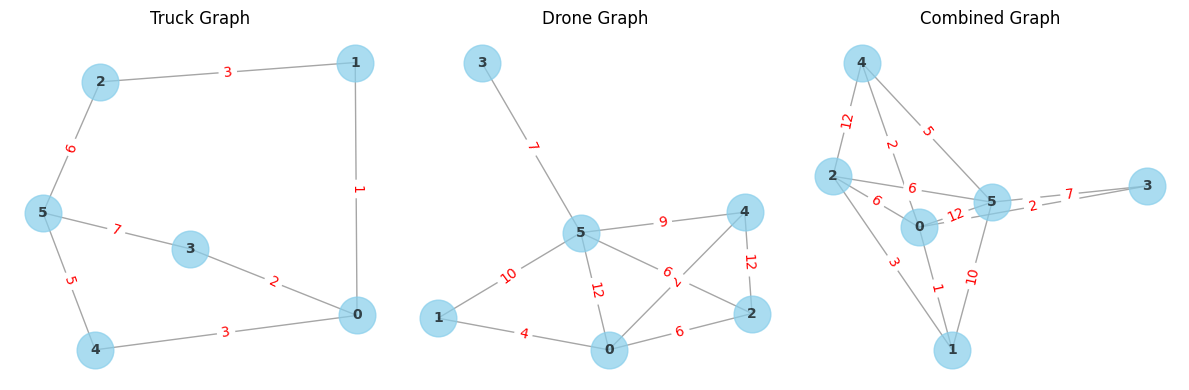

Permutation 2: [0, 2, 3, 5, 4]
Total cost (Combined): 22
Minimum cost path (Combined 0->2): [0, 1, 2]
Minimum cost path (Combined 2->3): [2, 1, 0, 3]
Minimum cost path (Combined 3->5): [3, 5]
Minimum cost path (Combined 5->4): [5, 4]
Path covered by truck in combined graph:
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 1), Weight (Truck): 3
Edge: (1, 0), Weight (Truck): 1
Edge: (0, 3), Weight (Truck): 2
Edge: (3, 5), Weight (Truck): 7
Edge: (5, 4), Weight (Truck): 5
Path covered by drone in combined graph:
Edge: (3, 5), Weight (Drone): 7
----------------------------------------


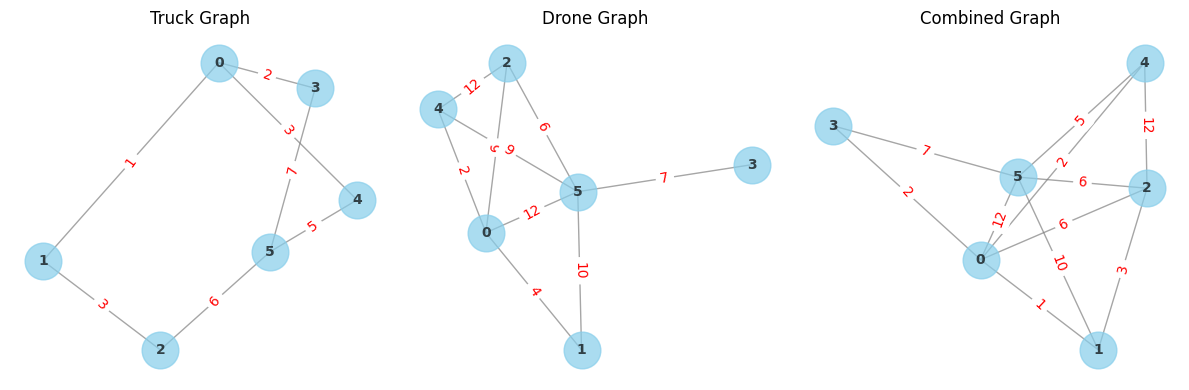

Permutation 3: [0, 2, 4, 3, 5]
Total cost (Combined): 21
Minimum cost path (Combined 0->2): [0, 1, 2]
Minimum cost path (Combined 2->4): [2, 1, 0, 4]
Minimum cost path (Combined 4->3): [4, 0, 3]
Minimum cost path (Combined 3->5): [3, 5]
Path covered by truck in combined graph:
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 1), Weight (Truck): 3
Edge: (1, 0), Weight (Truck): 1
Edge: (0, 3), Weight (Truck): 2
Edge: (3, 5), Weight (Truck): 7
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (4, 0), Weight (Drone): 2
Edge: (3, 5), Weight (Drone): 7
----------------------------------------


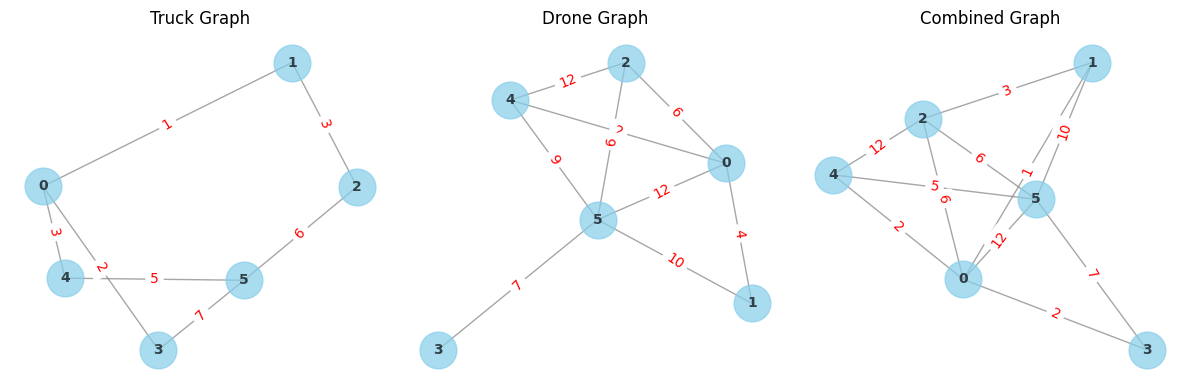

Permutation 4: [0, 2, 4, 5, 3]
Total cost (Combined): 22
Minimum cost path (Combined 0->2): [0, 1, 2]
Minimum cost path (Combined 2->4): [2, 1, 0, 4]
Minimum cost path (Combined 4->5): [4, 5]
Minimum cost path (Combined 5->3): [5, 3]
Path covered by truck in combined graph:
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 1), Weight (Truck): 3
Edge: (1, 0), Weight (Truck): 1
Edge: (4, 5), Weight (Truck): 5
Edge: (5, 3), Weight (Truck): 7
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (5, 3), Weight (Drone): 7
----------------------------------------


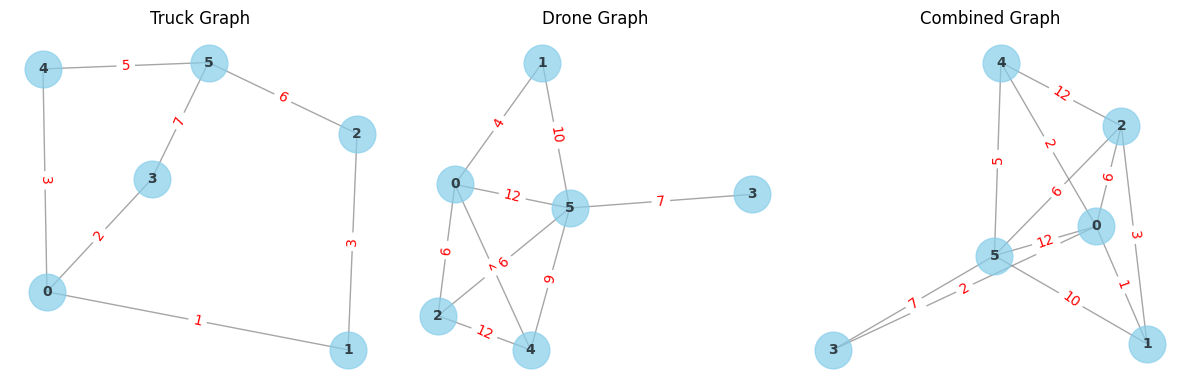

Permutation 5: [0, 2, 5, 3, 4]
Total cost (Combined): 21
Minimum cost path (Combined 0->2): [0, 1, 2]
Minimum cost path (Combined 2->5): [2, 5]
Minimum cost path (Combined 5->3): [5, 3]
Minimum cost path (Combined 3->4): [3, 0, 4]
Path covered by truck in combined graph:
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 5), Weight (Truck): 6
Edge: (5, 3), Weight (Truck): 7
Edge: (3, 0), Weight (Truck): 2
Path covered by drone in combined graph:
Edge: (2, 5), Weight (Drone): 6
Edge: (5, 3), Weight (Drone): 7
Edge: (0, 4), Weight (Drone): 2
----------------------------------------


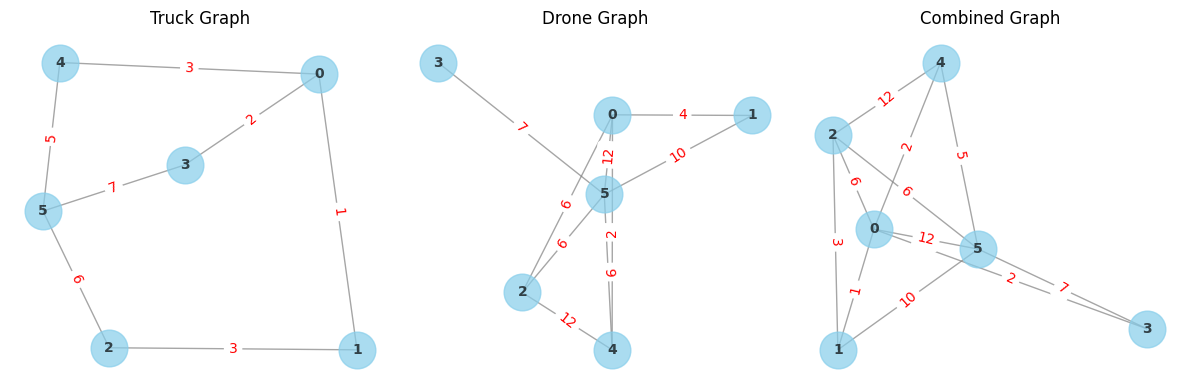

Permutation 6: [0, 2, 5, 4, 3]
Total cost (Combined): 19
Minimum cost path (Combined 0->2): [0, 1, 2]
Minimum cost path (Combined 2->5): [2, 5]
Minimum cost path (Combined 5->4): [5, 4]
Minimum cost path (Combined 4->3): [4, 0, 3]
Path covered by truck in combined graph:
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 5), Weight (Truck): 6
Edge: (5, 4), Weight (Truck): 5
Edge: (0, 3), Weight (Truck): 2
Path covered by drone in combined graph:
Edge: (2, 5), Weight (Drone): 6
Edge: (4, 0), Weight (Drone): 2
----------------------------------------


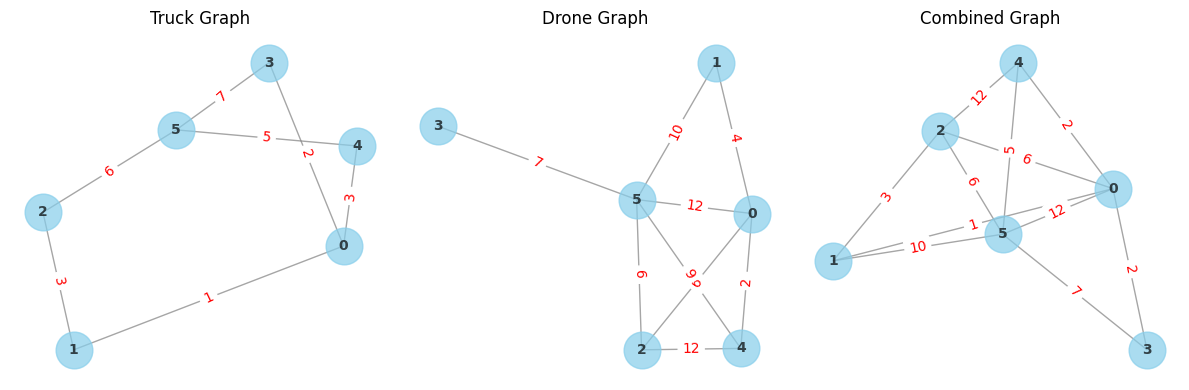

Permutation 7: [0, 3, 2, 4, 5]
Total cost (Combined): 19
Minimum cost path (Combined 0->3): [0, 3]
Minimum cost path (Combined 3->2): [3, 0, 1, 2]
Minimum cost path (Combined 2->4): [2, 1, 0, 4]
Minimum cost path (Combined 4->5): [4, 5]
Path covered by truck in combined graph:
Edge: (0, 3), Weight (Truck): 2
Edge: (3, 0), Weight (Truck): 2
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 1), Weight (Truck): 3
Edge: (1, 0), Weight (Truck): 1
Edge: (4, 5), Weight (Truck): 5
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
----------------------------------------


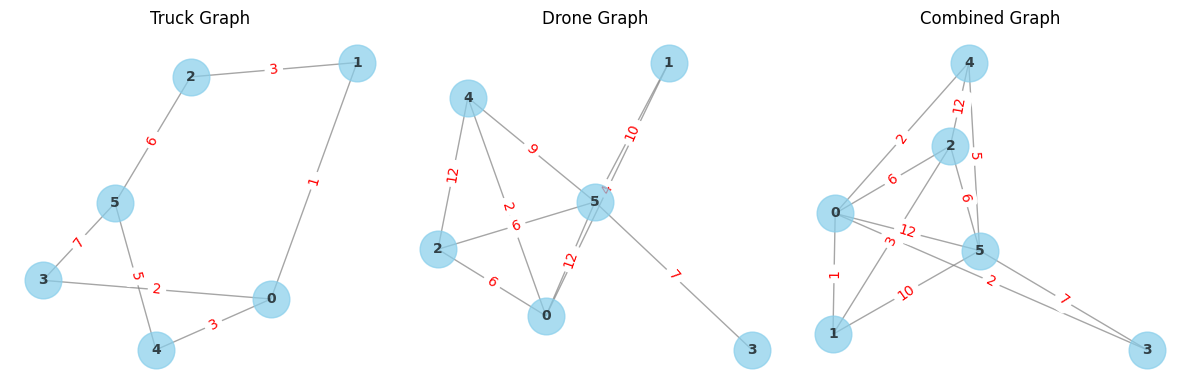

Permutation 8: [0, 3, 2, 5, 4]
Total cost (Combined): 19
Minimum cost path (Combined 0->3): [0, 3]
Minimum cost path (Combined 3->2): [3, 0, 1, 2]
Minimum cost path (Combined 2->5): [2, 5]
Minimum cost path (Combined 5->4): [5, 4]
Path covered by truck in combined graph:
Edge: (0, 3), Weight (Truck): 2
Edge: (3, 0), Weight (Truck): 2
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 5), Weight (Truck): 6
Edge: (5, 4), Weight (Truck): 5
Path covered by drone in combined graph:
Edge: (2, 5), Weight (Drone): 6
----------------------------------------


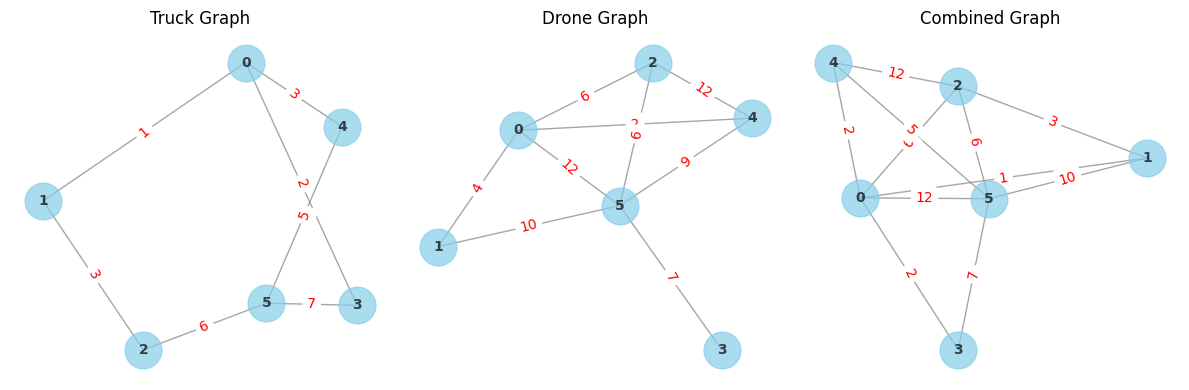

Permutation 9: [0, 3, 4, 2, 5]
Total cost (Combined): 18
Minimum cost path (Combined 0->3): [0, 3]
Minimum cost path (Combined 3->4): [3, 0, 4]
Minimum cost path (Combined 4->2): [4, 0, 1, 2]
Minimum cost path (Combined 2->5): [2, 5]
Path covered by truck in combined graph:
Edge: (0, 3), Weight (Truck): 2
Edge: (3, 0), Weight (Truck): 2
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 5), Weight (Truck): 6
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (4, 0), Weight (Drone): 2
Edge: (2, 5), Weight (Drone): 6
----------------------------------------


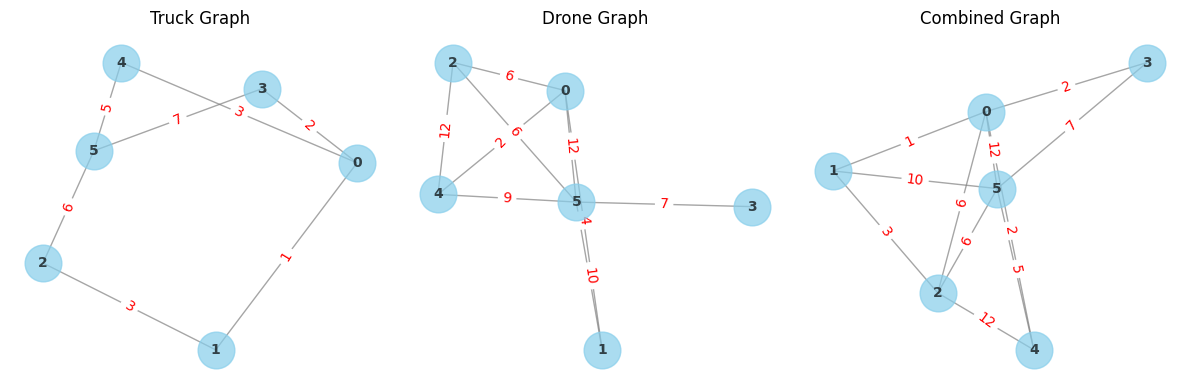

Permutation 10: [0, 3, 4, 5, 2]
Total cost (Combined): 17
Minimum cost path (Combined 0->3): [0, 3]
Minimum cost path (Combined 3->4): [3, 0, 4]
Minimum cost path (Combined 4->5): [4, 5]
Minimum cost path (Combined 5->2): [5, 2]
Path covered by truck in combined graph:
Edge: (0, 3), Weight (Truck): 2
Edge: (3, 0), Weight (Truck): 2
Edge: (4, 5), Weight (Truck): 5
Edge: (5, 2), Weight (Truck): 6
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (5, 2), Weight (Drone): 6
----------------------------------------


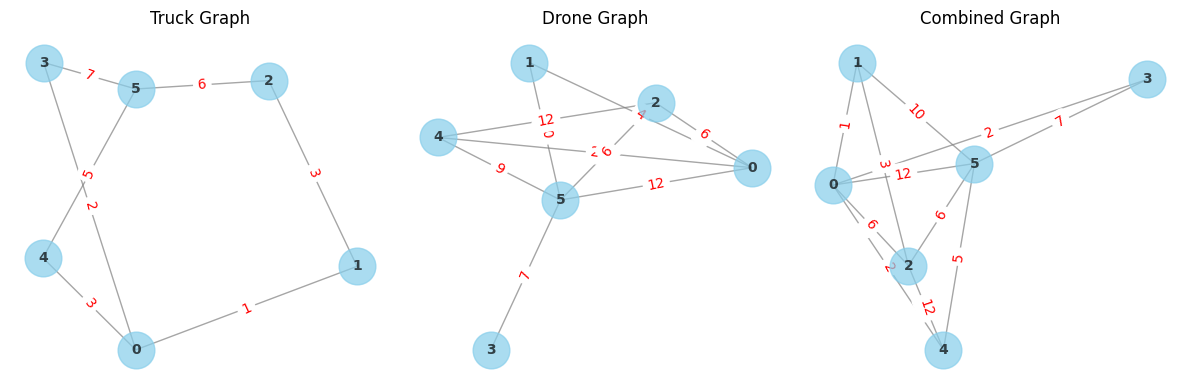

Permutation 11: [0, 3, 5, 2, 4]
Total cost (Combined): 21
Minimum cost path (Combined 0->3): [0, 3]
Minimum cost path (Combined 3->5): [3, 5]
Minimum cost path (Combined 5->2): [5, 2]
Minimum cost path (Combined 2->4): [2, 1, 0, 4]
Path covered by truck in combined graph:
Edge: (0, 3), Weight (Truck): 2
Edge: (3, 5), Weight (Truck): 7
Edge: (5, 2), Weight (Truck): 6
Edge: (2, 1), Weight (Truck): 3
Edge: (1, 0), Weight (Truck): 1
Path covered by drone in combined graph:
Edge: (3, 5), Weight (Drone): 7
Edge: (5, 2), Weight (Drone): 6
Edge: (0, 4), Weight (Drone): 2
----------------------------------------


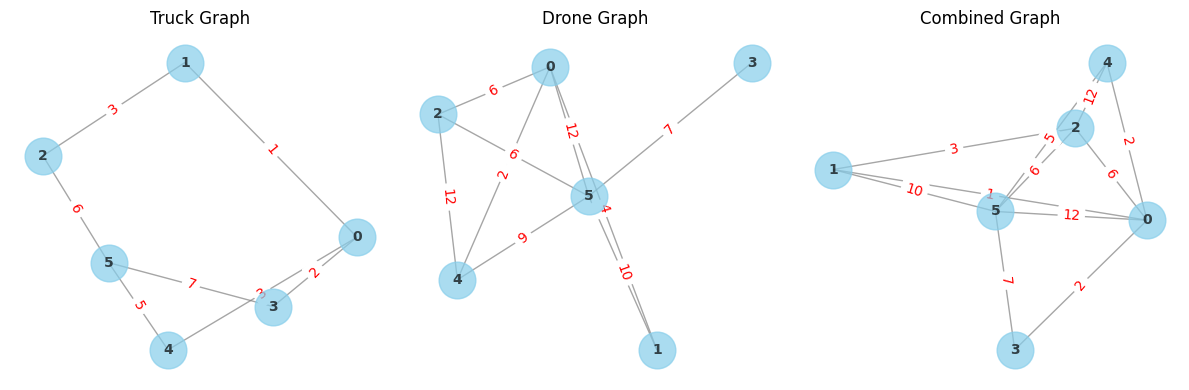

Permutation 12: [0, 3, 5, 4, 2]
Total cost (Combined): 20
Minimum cost path (Combined 0->3): [0, 3]
Minimum cost path (Combined 3->5): [3, 5]
Minimum cost path (Combined 5->4): [5, 4]
Minimum cost path (Combined 4->2): [4, 0, 1, 2]
Path covered by truck in combined graph:
Edge: (0, 3), Weight (Truck): 2
Edge: (3, 5), Weight (Truck): 7
Edge: (5, 4), Weight (Truck): 5
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Path covered by drone in combined graph:
Edge: (3, 5), Weight (Drone): 7
Edge: (4, 0), Weight (Drone): 2
----------------------------------------


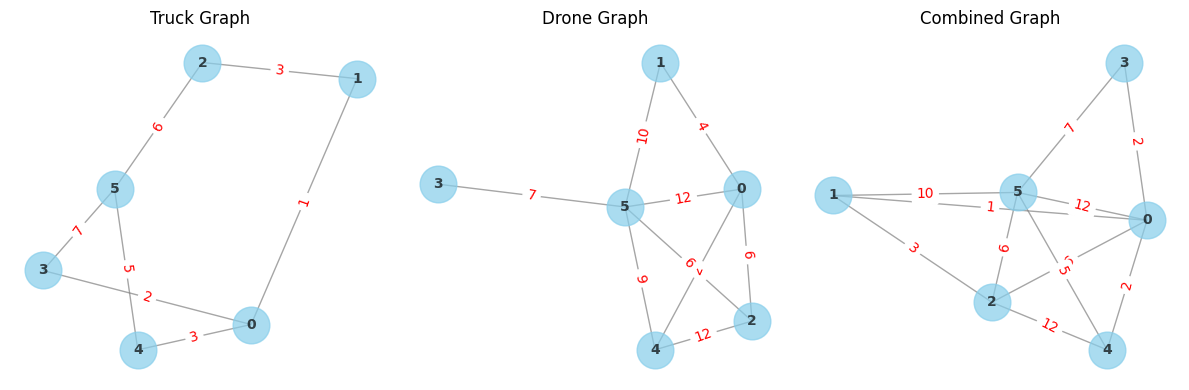

Permutation 13: [0, 4, 2, 3, 5]
Total cost (Combined): 21
Minimum cost path (Combined 0->4): [0, 4]
Minimum cost path (Combined 4->2): [4, 0, 1, 2]
Minimum cost path (Combined 2->3): [2, 1, 0, 3]
Minimum cost path (Combined 3->5): [3, 5]
Path covered by truck in combined graph:
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 1), Weight (Truck): 3
Edge: (1, 0), Weight (Truck): 1
Edge: (0, 3), Weight (Truck): 2
Edge: (3, 5), Weight (Truck): 7
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (4, 0), Weight (Drone): 2
Edge: (3, 5), Weight (Drone): 7
----------------------------------------


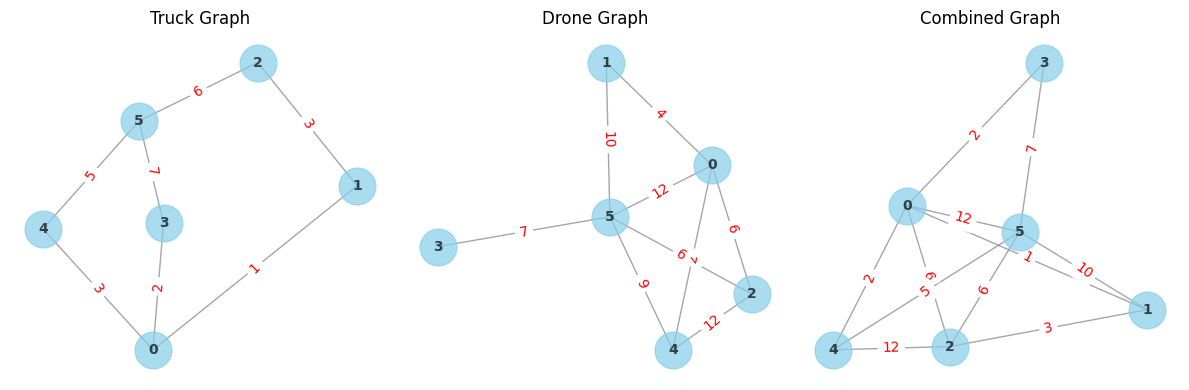

Permutation 14: [0, 4, 2, 5, 3]
Total cost (Combined): 21
Minimum cost path (Combined 0->4): [0, 4]
Minimum cost path (Combined 4->2): [4, 0, 1, 2]
Minimum cost path (Combined 2->5): [2, 5]
Minimum cost path (Combined 5->3): [5, 3]
Path covered by truck in combined graph:
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 5), Weight (Truck): 6
Edge: (5, 3), Weight (Truck): 7
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (4, 0), Weight (Drone): 2
Edge: (2, 5), Weight (Drone): 6
Edge: (5, 3), Weight (Drone): 7
----------------------------------------


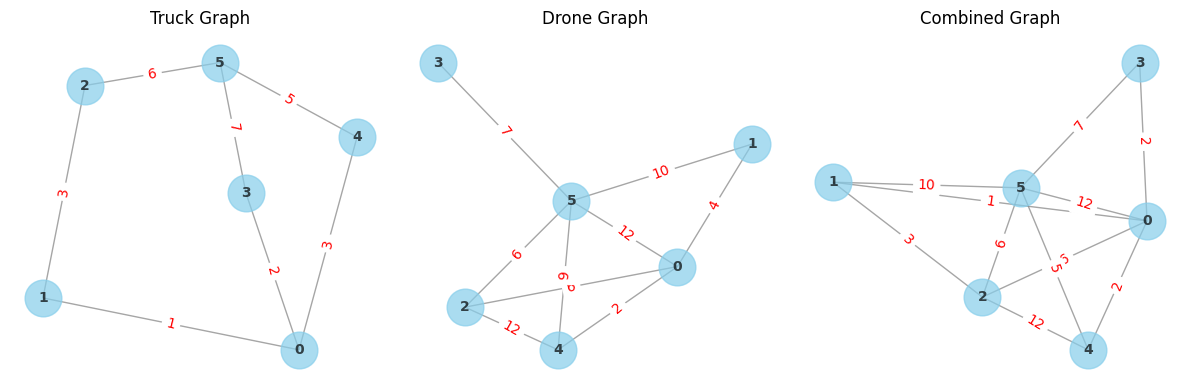

Permutation 15: [0, 4, 3, 2, 5]
Total cost (Combined): 18
Minimum cost path (Combined 0->4): [0, 4]
Minimum cost path (Combined 4->3): [4, 0, 3]
Minimum cost path (Combined 3->2): [3, 0, 1, 2]
Minimum cost path (Combined 2->5): [2, 5]
Path covered by truck in combined graph:
Edge: (0, 3), Weight (Truck): 2
Edge: (3, 0), Weight (Truck): 2
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 5), Weight (Truck): 6
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (4, 0), Weight (Drone): 2
Edge: (2, 5), Weight (Drone): 6
----------------------------------------


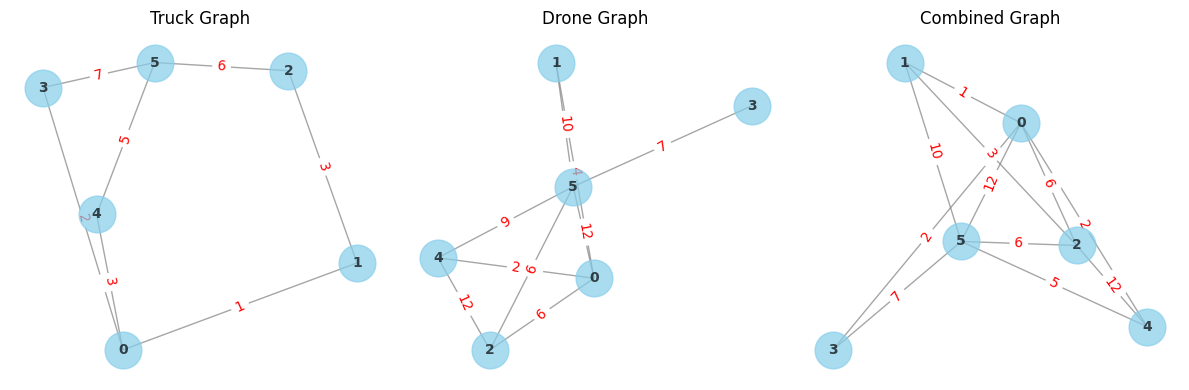

Permutation 16: [0, 4, 3, 5, 2]
Total cost (Combined): 19
Minimum cost path (Combined 0->4): [0, 4]
Minimum cost path (Combined 4->3): [4, 0, 3]
Minimum cost path (Combined 3->5): [3, 5]
Minimum cost path (Combined 5->2): [5, 2]
Path covered by truck in combined graph:
Edge: (0, 3), Weight (Truck): 2
Edge: (3, 5), Weight (Truck): 7
Edge: (5, 2), Weight (Truck): 6
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (4, 0), Weight (Drone): 2
Edge: (3, 5), Weight (Drone): 7
Edge: (5, 2), Weight (Drone): 6
----------------------------------------


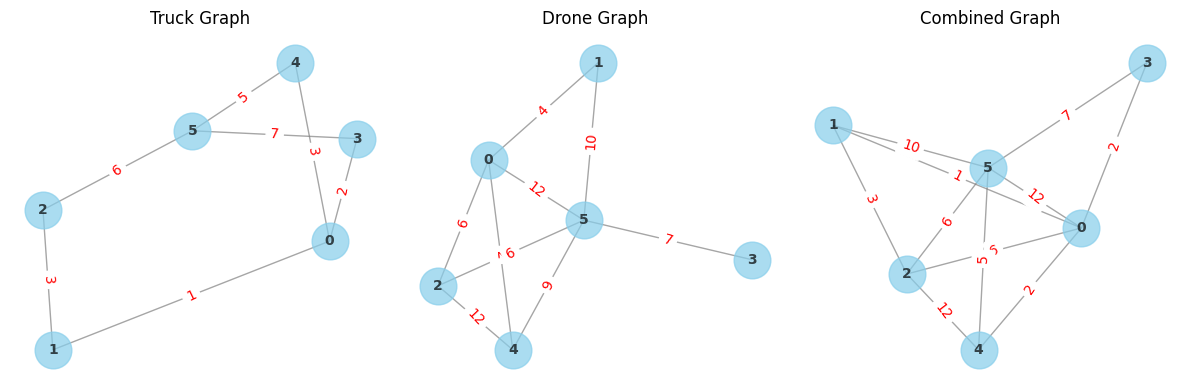

Permutation 17: [0, 4, 5, 2, 3]
Total cost (Combined): 19
Minimum cost path (Combined 0->4): [0, 4]
Minimum cost path (Combined 4->5): [4, 5]
Minimum cost path (Combined 5->2): [5, 2]
Minimum cost path (Combined 2->3): [2, 1, 0, 3]
Path covered by truck in combined graph:
Edge: (4, 5), Weight (Truck): 5
Edge: (5, 2), Weight (Truck): 6
Edge: (2, 1), Weight (Truck): 3
Edge: (1, 0), Weight (Truck): 1
Edge: (0, 3), Weight (Truck): 2
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (5, 2), Weight (Drone): 6
----------------------------------------


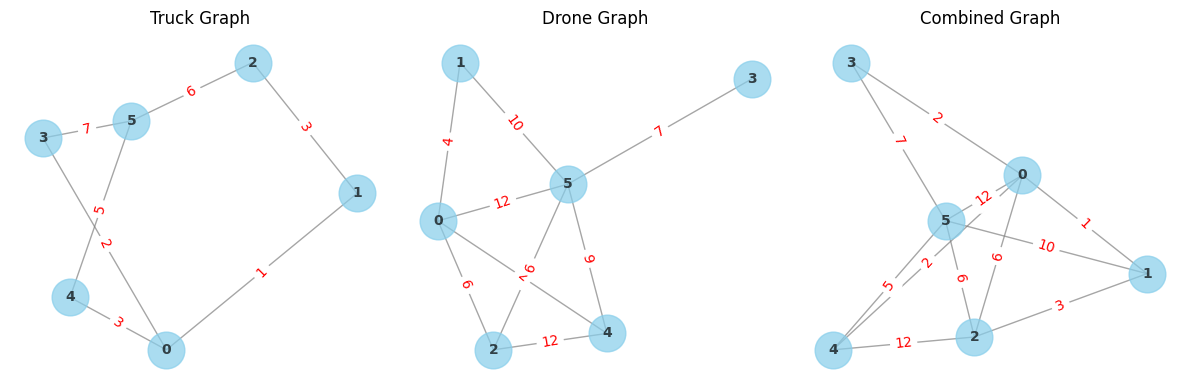

Permutation 18: [0, 4, 5, 3, 2]
Total cost (Combined): 20
Minimum cost path (Combined 0->4): [0, 4]
Minimum cost path (Combined 4->5): [4, 5]
Minimum cost path (Combined 5->3): [5, 3]
Minimum cost path (Combined 3->2): [3, 0, 1, 2]
Path covered by truck in combined graph:
Edge: (4, 5), Weight (Truck): 5
Edge: (5, 3), Weight (Truck): 7
Edge: (3, 0), Weight (Truck): 2
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (5, 3), Weight (Drone): 7
----------------------------------------


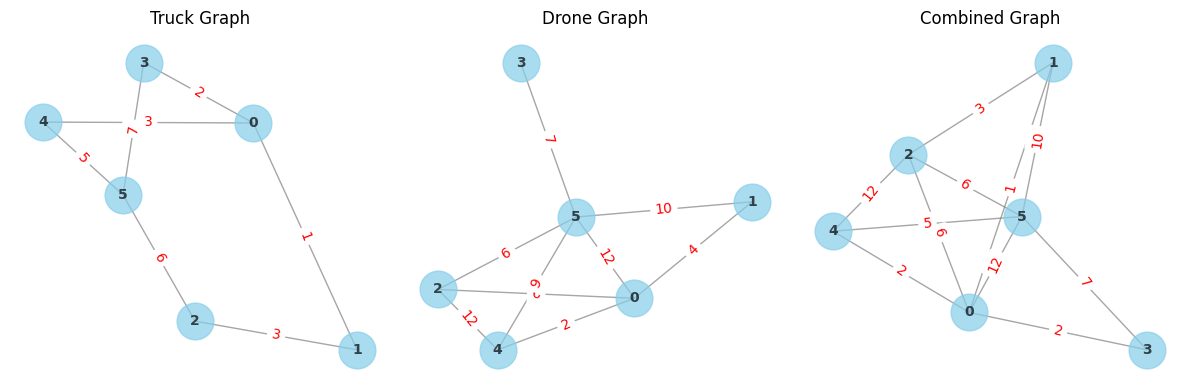

Permutation 19: [0, 5, 2, 3, 4]
Total cost (Combined): 23
Minimum cost path (Combined 0->5): [0, 4, 5]
Minimum cost path (Combined 5->2): [5, 2]
Minimum cost path (Combined 2->3): [2, 1, 0, 3]
Minimum cost path (Combined 3->4): [3, 0, 4]
Path covered by truck in combined graph:
Edge: (4, 5), Weight (Truck): 5
Edge: (5, 2), Weight (Truck): 6
Edge: (2, 1), Weight (Truck): 3
Edge: (1, 0), Weight (Truck): 1
Edge: (0, 3), Weight (Truck): 2
Edge: (3, 0), Weight (Truck): 2
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (5, 2), Weight (Drone): 6
Edge: (0, 4), Weight (Drone): 2
----------------------------------------


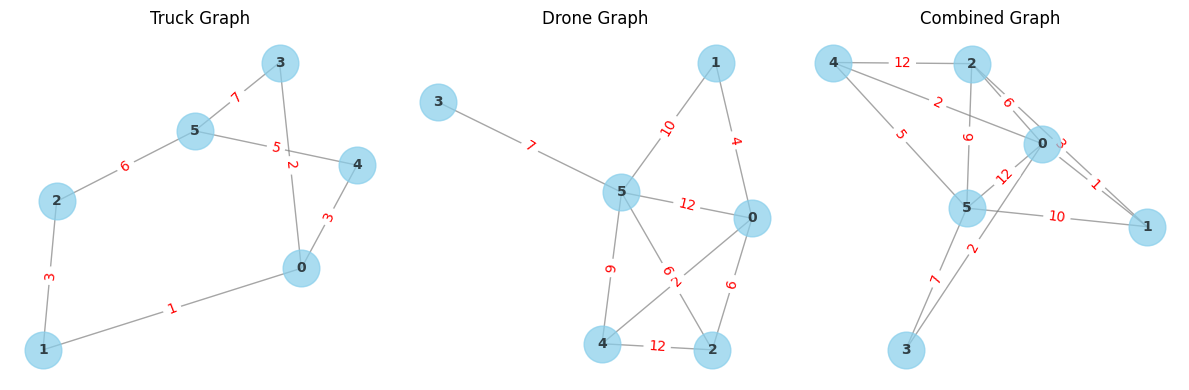

Permutation 20: [0, 5, 2, 4, 3]
Total cost (Combined): 23
Minimum cost path (Combined 0->5): [0, 4, 5]
Minimum cost path (Combined 5->2): [5, 2]
Minimum cost path (Combined 2->4): [2, 1, 0, 4]
Minimum cost path (Combined 4->3): [4, 0, 3]
Path covered by truck in combined graph:
Edge: (4, 5), Weight (Truck): 5
Edge: (5, 2), Weight (Truck): 6
Edge: (2, 1), Weight (Truck): 3
Edge: (1, 0), Weight (Truck): 1
Edge: (0, 3), Weight (Truck): 2
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (5, 2), Weight (Drone): 6
Edge: (0, 4), Weight (Drone): 2
Edge: (4, 0), Weight (Drone): 2
----------------------------------------


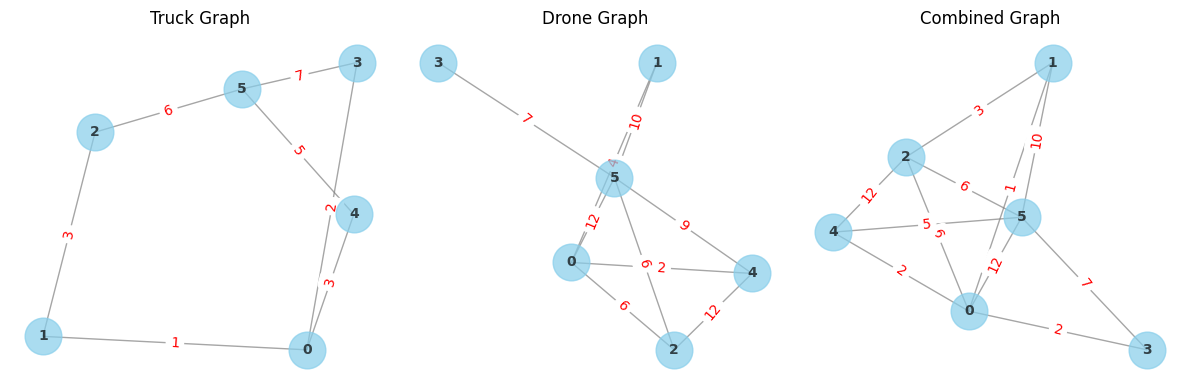

Permutation 21: [0, 5, 3, 2, 4]
Total cost (Combined): 26
Minimum cost path (Combined 0->5): [0, 4, 5]
Minimum cost path (Combined 5->3): [5, 3]
Minimum cost path (Combined 3->2): [3, 0, 1, 2]
Minimum cost path (Combined 2->4): [2, 1, 0, 4]
Path covered by truck in combined graph:
Edge: (4, 5), Weight (Truck): 5
Edge: (5, 3), Weight (Truck): 7
Edge: (3, 0), Weight (Truck): 2
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 1), Weight (Truck): 3
Edge: (1, 0), Weight (Truck): 1
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (5, 3), Weight (Drone): 7
Edge: (0, 4), Weight (Drone): 2
----------------------------------------


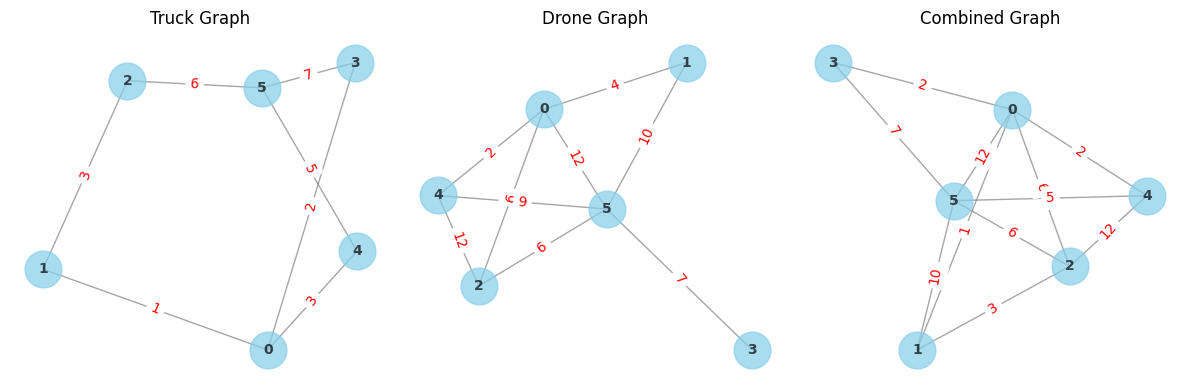

Permutation 22: [0, 5, 3, 4, 2]
Total cost (Combined): 24
Minimum cost path (Combined 0->5): [0, 4, 5]
Minimum cost path (Combined 5->3): [5, 3]
Minimum cost path (Combined 3->4): [3, 0, 4]
Minimum cost path (Combined 4->2): [4, 0, 1, 2]
Path covered by truck in combined graph:
Edge: (4, 5), Weight (Truck): 5
Edge: (5, 3), Weight (Truck): 7
Edge: (3, 0), Weight (Truck): 2
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (5, 3), Weight (Drone): 7
Edge: (0, 4), Weight (Drone): 2
Edge: (4, 0), Weight (Drone): 2
----------------------------------------


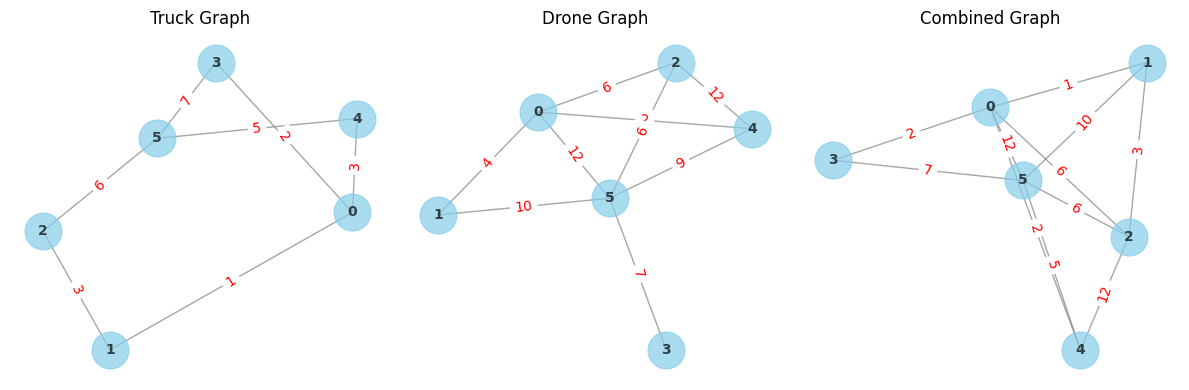

Permutation 23: [0, 5, 4, 2, 3]
Total cost (Combined): 24
Minimum cost path (Combined 0->5): [0, 4, 5]
Minimum cost path (Combined 5->4): [5, 4]
Minimum cost path (Combined 4->2): [4, 0, 1, 2]
Minimum cost path (Combined 2->3): [2, 1, 0, 3]
Path covered by truck in combined graph:
Edge: (4, 5), Weight (Truck): 5
Edge: (5, 4), Weight (Truck): 5
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Edge: (2, 1), Weight (Truck): 3
Edge: (1, 0), Weight (Truck): 1
Edge: (0, 3), Weight (Truck): 2
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (4, 0), Weight (Drone): 2
----------------------------------------


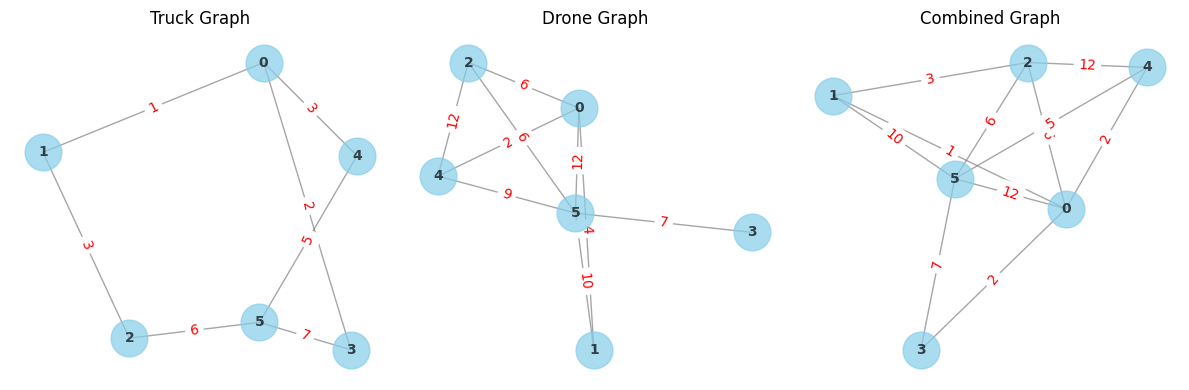

Permutation 24: [0, 5, 4, 3, 2]
Total cost (Combined): 22
Minimum cost path (Combined 0->5): [0, 4, 5]
Minimum cost path (Combined 5->4): [5, 4]
Minimum cost path (Combined 4->3): [4, 0, 3]
Minimum cost path (Combined 3->2): [3, 0, 1, 2]
Path covered by truck in combined graph:
Edge: (4, 5), Weight (Truck): 5
Edge: (5, 4), Weight (Truck): 5
Edge: (0, 3), Weight (Truck): 2
Edge: (3, 0), Weight (Truck): 2
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 2), Weight (Truck): 3
Path covered by drone in combined graph:
Edge: (0, 4), Weight (Drone): 2
Edge: (4, 0), Weight (Drone): 2
----------------------------------------


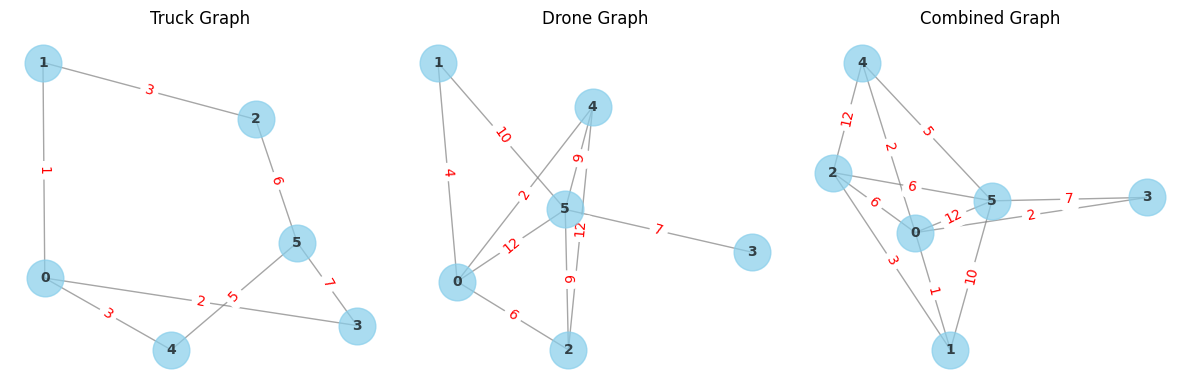

Optimal Path: [0, 3, 4, 5, 2]
Minimum Cost: 17


In [ ]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges for each path considering multiple final destinations
truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
drone_path_edges = [(0, 5, 12), (4, 5, 9), (3, 5, 7), (1, 5, 10), (2, 5, 6), (0, 4, 2), (0, 1, 4), (2, 4, 12), (0, 2, 6)]

# Define the destination points
destinations = [2, 3, 4, 5]  # Modify this list for different destination points

# Create truck graph
truck_G = nx.Graph()
truck_G.add_weighted_edges_from(truck_path_edges)

# Create drone graph
drone_G = nx.Graph()
drone_G.add_weighted_edges_from(drone_path_edges)

# Combine the graphs, resolving common edges with minimum weight
combined_G = nx.Graph()
for edge in set(truck_G.edges).union(drone_G.edges):
    if edge in truck_G.edges and edge in drone_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        min_weight = min(weight_truck, weight_drone)
        combined_G.add_edge(edge[0], edge[1], weight=min_weight)
    elif edge in truck_G.edges:
        combined_G.add_edge(edge[0], edge[1], weight=truck_G[edge[0]][edge[1]]['weight'])
    elif edge in drone_G.edges:
        combined_G.add_edge(edge[0], edge[1], weight=drone_G[edge[0]][edge[1]]['weight'])

# Function to calculate the total cost for a given permutation of destinations
def calculate_total_cost(permutation):
    total_cost = 0
    for i in range(len(permutation)):
        if i == 0:
            total_cost += nx.shortest_path_length(combined_G, source=0, target=permutation[i], weight='weight')
        else:
            total_cost += nx.shortest_path_length(combined_G, source=permutation[i - 1], target=permutation[i], weight='weight')
    return total_cost

# Find all permutations of destination points with 0 at the beginning
permutations = [[0] + list(perm) for perm in itertools.permutations(destinations)]

# Print details for each permutation
for i, perm in enumerate(permutations, start=1):
    print(f"Permutation {i}: {perm}")

    total_cost_combined = calculate_total_cost(perm)
    print("Total cost (Combined):", total_cost_combined)

    min_cost_paths_combined = {}
    for j in range(len(perm) - 1):
        min_cost_paths_combined[(perm[j], perm[j + 1])] = nx.shortest_path(combined_G, source=perm[j], target=perm[j + 1], weight='weight')

    for key, path in min_cost_paths_combined.items():
        print(f"Minimum cost path (Combined {key[0]}->{key[1]}):", path)

    truck_path_combined = []
    for key, path in min_cost_paths_combined.items():
        for k in range(len(path) - 1):
            edge = (path[k], path[k + 1])
            if edge in truck_G.edges:
                weight_truck = truck_G[edge[0]][edge[1]]['weight']
                weight_combined = combined_G[edge[0]][edge[1]]['weight']
                if weight_truck == weight_combined:
                    truck_path_combined.append((edge, weight_truck))

    print("Path covered by truck in combined graph:")
    for (edge, weight) in truck_path_combined:
        print(f"Edge: {edge}, Weight (Truck): {weight}")

    drone_path_combined = []
    for key, path in min_cost_paths_combined.items():
        for k in range(len(path) - 1):
            edge = (path[k], path[k + 1])
            if edge in drone_G.edges:
                weight_drone = drone_G[edge[0]][edge[1]]['weight']
                weight_combined = combined_G[edge[0]][edge[1]]['weight']
                if weight_drone == weight_combined:
                    drone_path_combined.append((edge, weight_drone))

    print("Path covered by drone in combined graph:")
    for (edge, weight) in drone_path_combined:
        print(f"Edge: {edge}, Weight (Drone): {weight}")

    print("-" * 40)

    # Plot individual truck graph
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    pos_truck = nx.spring_layout(truck_G)
    nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
    edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
    nx.draw_networkx_edge_labels
    nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
    plt.title("Truck Graph")

    # Plot individual drone graph
    plt.subplot(132)
    pos_drone = nx.spring_layout(drone_G)
    nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
    edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
    nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
    plt.title("Drone Graph")

    # Plot the combined graph
    plt.subplot(133)
    pos_combined = nx.spring_layout(combined_G)
    nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
    edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
    nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
    plt.title("Combined Graph")

    plt.tight_layout()
    plt.show()

# Calculate total cost for each permutation
min_cost = float('inf')
optimal_path = None
for perm in permutations:
    cost = calculate_total_cost(perm)
    if cost < min_cost:
        min_cost = cost
        optimal_path = perm

print("Optimal Path:", optimal_path)
print("Minimum Cost:", min_cost)


In [ ]:
!pip install -q pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
from pyomo.environ import *

# Define the sets
W = [0, 1, 2, 3, 4, 5]  # Warehouses and customers
C = [(i, j) for i in W for j in W if i != j]  # Links between nodes
C_pairs = [(i, j) for (i, j) in C if i < j]  # Unique pairs of links

# Initialize the model
model = ConcreteModel()

# Decision variables
model.x = Var(C, domain=Binary)  # Truck decision variable
model.d = Var(C, domain=Binary)  # Drone decision variable
model.y = Var(W, domain=Binary)  # Truck visit decision variable
model.z = Var(W, domain=Binary)  # Drone visit decision variable

# Parameters
model.Dist = Param(C, initialize={  # Distance matrix
    (0, 1): 1, (0, 2): 2, (0, 3): 3, (0, 4): 3, (0, 5): 12,
    (1, 0): 1, (1, 2): 3, (1, 3): 1, (1, 4): 4, (1, 5): 10,
    (2, 0): 2, (2, 1): 3, (2, 3): 1, (2, 4): 12, (2, 5): 6,
    (3, 0): 3, (3, 1): 1, (3, 2): 1, (3, 4): 7, (3, 5): 7,
    (4, 0): 3, (4, 1): 4, (4, 2): 12, (4, 3): 7, (4, 5): 9,
    (5, 0): 12, (5, 1): 10, (5, 2): 6, (5, 3): 7, (5, 4): 9
})

# Unit variable costs
alpha_truck = 1
alpha_drone = 1
model.C_truck = Param(initialize=alpha_truck)  # Unit variable cost for truck
model.C_drone = Param(initialize=alpha_drone)  # Unit variable cost for drone

# Weight parameters
beta = 1
lambda_ = 1
model.beta = Param(initialize=beta)  # Weight parameter for package delivery cost
model.lambda_ = Param(initialize=lambda_)  # Weight parameter for time component

# Define constraints
def sum_rule(model, i):
    sum_expr = sum(model.x[i, k] + model.d[k, j] for k, j in C if k == i and (i, k) in model.x)
    if sum_expr == 1:
        return 1
    else:
        return Constraint.Infeasible

def serve_either_by_truck_or_drone_rule(model, i):
    return sum_rule(model, i) == 1

model.serve_either_by_truck_or_drone_constraint = Constraint(W, rule=serve_either_by_truck_or_drone_rule)

def truck_time_constraint_rule(model, i, k):
    return model.x[i, k] * model.Dist[i, k] <= 10  # Truck time constraint (example condition)
model.truck_time_constraint = Constraint(C, rule=truck_time_constraint_rule)

def drone_time_constraint_rule(model, k, j):
    return model.d[k, j] * model.Dist[k, j] <= 5  # Drone time constraint (example condition)
model.drone_time_constraint = Constraint(C, rule=drone_time_constraint_rule)

def drone_dispatch_constraint_rule(model, k):
    return model.d[k, k] <= model.x[k, k]  # Drone dispatch constraint
model.drone_dispatch_constraint = Constraint(W, rule=drone_dispatch_constraint_rule)

def mark_nodes_visited_by_truck_rule(model, i, j):
    return model.x[i, j] == model.y[j]  # Mark nodes visited by truck
model.mark_nodes_visited_by_truck_constraint = Constraint(C, rule=mark_nodes_visited_by_truck_rule)

def mark_nodes_visited_by_drone_rule(model, k, j):
    return model.d[k, j] == model.z[j]  # Mark nodes visited by drone
model.mark_nodes_visited_by_drone_constraint = Constraint(C, rule=mark_nodes_visited_by_drone_rule)

# Objective function
def objective_rule(model):
    return (model.C_truck * sum(model.x[i, k] * model.Dist[i, k] for (i, k) in C) +
            model.C_drone * sum(model.d[k, j] * model.Dist[k, j] for (k, j) in C) +
            model.beta * sum(model.p[i, j] * model.Dist[i, j] for (i, j) in C) +
            model.lambda_ * sum((model.x[i, k] + model.d[k, j]) * (model.Dist[i, k] + model.Dist[k, j])
                                for (i, j) in C_pairs for k in W))
model.objective = Objective(rule=objective_rule, sense=minimize)

# Solve the model
solver = SolverFactory('glpk')
results = solver.solve(model)

# Print results
print("Objective value:", model.objective())
print("Truck decision variable:")
for (i, k) in C:
    print("x[{}, {}] = {}".format(i, k, model.x[i, k].value))
print("Drone decision variable:")
for (k, j) in C:
    print("d[{}, {}] = {}".format(k, j, model.d[k, j].value))
print("Truck visit decision variable:")
for i in W:
    print("y[{}] = {}".format(i, model.y[i].value))
print("Drone visit decision variable:")
for k in W:
    print("z[{}] = {}".format(k, model.z[k].value))

In [ ]:
pip install gurobipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 17.7 MB/s eta 0:00:00


In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Define the problem parameters from the given data
num_nodes = 6  # Number of nodes (including the warehouse at index 0)
num_warehouses = 1  # Number of warehouses
truck_speed = 50  # Assuming a truck speed of 50 km/h
drone_speed = 80  # Assuming a drone speed of 80 km/h
alpha_T = 1  # Unit variable cost for the truck
alpha_D = 2  # Unit variable cost for the drone
beta = 10  # Weight parameter for package delivery cost
lmbda = 0.5  # Weight parameter for time component

# Define the truck and drone path edges and their weights
truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
drone_path_edges = [(0, 5, 12), (4, 5, 9), (3, 5, 7), (1, 5, 10), (2, 5, 6), (0, 4, 2), (0, 1, 4), (2, 4, 12), (0, 2, 6)]

# Create a new Gurobi model
model = gp.Model("Truck-Drone Hybrid Delivery")

# Define decision variables
x = model.addVars(num_warehouses, num_nodes, num_nodes, vtype=GRB.BINARY, name="x")
d = model.addVars(num_nodes, num_nodes, vtype=GRB.BINARY, name="d")
y = model.addVars(num_warehouses, num_nodes, vtype=GRB.BINARY, name="y")
z = model.addVars(num_nodes, num_nodes, vtype=GRB.BINARY, name="z")
T_truck = model.addVars(num_warehouses, num_nodes, vtype=GRB.CONTINUOUS, name="T_truck")
T_drone = model.addVars(num_nodes, num_nodes, vtype=GRB.CONTINUOUS, name="T_drone")
p = model.addVars(num_nodes, num_nodes, vtype=GRB.BINARY, name="p")

# Define the objective function
obj = 0
for i in range(num_warehouses):
    for k in range(num_nodes):
        for j in range(1, num_nodes):
            truck_weight = next((edge[2] for edge in truck_path_edges if edge[:2] == (k, j)), 0)
            obj += alpha_T * x[i, k, j] * truck_weight
for k in range(num_nodes):
    for j in range(1, num_nodes):
        drone_weight = next((edge[2] for edge in drone_path_edges if edge[:2] == (k, j)), 0)
        obj += alpha_D * d[k, j] * drone_weight
for k in range(num_nodes):
    for j in range(1, num_nodes):
        obj += beta * p[k, j] * package_cost[k][j]  # Assuming package_cost is provided
for i in range(num_warehouses):
    for k in range(num_nodes):
        obj += lmbda * T_truck[i, k]
for k in range(num_nodes):
    for j in range(1, num_nodes):
        obj += lmbda * T_drone[k, j]
model.setObjective(obj, GRB.MINIMIZE)

# Add constraints
for k in range(1, num_nodes):
    model.addConstr(sum(x[0, i, k] for i in range(num_nodes)) + sum(d[i, k] for i in range(num_nodes)) == 1)

for i in range(num_warehouses):
    for k in range(num_nodes):
        model.addConstr(T_truck[i, k] == truck_distance[i][k] / truck_speed)

for k in range(num_nodes):
    for j in range(1, num_nodes):
        model.addConstr(T_drone[k, j] == drone_distance[k][j] / drone_speed)

for i in range(num_warehouses):
    for k in range(num_nodes):
        for j in range(1, num_nodes):
            model.addConstr(x[i, k, j] >= d[k, j])

for i in range(num_warehouses):
    for k in range(num_nodes):
        model.addConstr(sum(x[i, k, j] for j in range(1, num_nodes)) == y[i, k])

for k in range(num_nodes):
    for j in range(1, num_nodes):
        model.addConstr(d[k, j] <= z[k, j])

# Optimize the model
model.optimize()

# Print the solution
if model.status == GRB.Status.OPTIMAL:
    print("Optimal solution found!")
    print("Objective value:", model.objVal)
    for i in range(num_warehouses):
        for k in range(num_nodes):
            for j in range(1, num_nodes):
                if x[i, k, j].x > 0.5:
                    print(f"Truck serves customer {j} from warehouse {i} via node {k}")
    for k in range(num_nodes):
        for j in range(1, num_nodes):
            if d[k, j].x > 0.5:
                print(f"Drone is dispatched from node {k} to serve customer {j}")
else:
    print("No optimal solution found.")

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 107 rows, 192 columns and 252 nonzeros
Model fingerprint: 0xa9f6b668
Variable types: 42 continuous, 150 integer (150 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-01, 1e+00]
Found heuristic solution: objective 13.4425000
Presolve removed 96 rows and 164 columns
Presolve time: 0.00s
Presolved: 11 rows, 28 columns, 56 nonzeros
Variable types: 0 continuous, 28 integer (28 binary)
Found heuristic solution: objective 8.4425000

Explored 0 nodes (0 simplex iterations) in 0.05 seconds (0.00 work units)
Thread count was 2 (of 2 available processors)

Solution count 2: 8.4425 13.4425 

Optimal solution found (tolerance 1.00e-04)
Best

In [ ]:
# import networkx as nx
# import matplotlib.pyplot as plt

# truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
# drone_path_edges = [(0, 5, 12), (4, 5, 5), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# # Create truck graph
# truck_G = nx.Graph()
# truck_G.add_weighted_edges_from(truck_path_edges)

# # Create drone graph
# drone_G = nx.Graph()
# drone_G.add_weighted_edges_from(drone_path_edges)

# # Plot individual truck graph
# plt.figure(figsize=(12, 4))
# plt.subplot(121)
# pos_truck = nx.spring_layout(truck_G)
# nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
# nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
# plt.title("Truck Graph")

# # Plot individual drone graph
# plt.subplot(122)
# pos_drone = nx.spring_layout(drone_G)
# nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
# nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
# plt.title("Drone Graph")

# plt.tight_layout()
# plt.show()

# # Plot the combined graph
# combined_G = nx.compose(truck_G, drone_G)
# plt.figure(figsize=(8, 6))
# pos_combined = nx.spring_layout(combined_G)
# nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
# nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
# plt.title("Combined Graph")

# # Calculate the total cost of the combined graph
# total_cost_combined = nx.shortest_path_length(combined_G, source=0, target=5, weight='weight')
# print("Total cost (Combined):", total_cost_combined)

# # Find and print the minimum cost path in the combined graph
# min_cost_path_combined = nx.shortest_path(combined_G, source=0, target=5, weight='weight')
# print("Minimum cost path (Combined):", min_cost_path_combined)

# # Extract the edges and their weights for the truck path in the combined graph
# truck_path_edges_combined = [(min_cost_path_combined[i], min_cost_path_combined[i + 1]) for i in range(len(min_cost_path_combined) - 1)]
# truck_path_weights_combined = [combined_G[min_cost_path_combined[i]][min_cost_path_combined[i + 1]]['weight'] for i in range(len(min_cost_path_combined) - 1)]

# # Print the truck path and its weights
# print("Truck Path in Combined Graph:")
# for edge, weight in zip(truck_path_edges_combined, truck_path_weights_combined):
#     print(f"Edge: {edge}, Weight: {weight}")

# # Extract the edges and their weights for the drone path in the combined graph
# drone_path_edges_combined = [(min_cost_path_combined[i], min_cost_path_combined[i + 1]) for i in range(len(min_cost_path_combined) - 1)]
# drone_path_weights_combined = [combined_G[min_cost_path_combined[i]][min_cost_path_combined[i + 1]]['weight'] for i in range(len(min_cost_path_combined) - 1)]

# # Print the drone path and its weights
# print("Drone Path in Combined Graph:")
# for edge, weight in zip(drone_path_edges_combined, drone_path_weights_combined):
#     print(f"Edge: {edge}, Weight: {weight}")


# plt.show()


In [ ]:
# import networkx as nx
# import matplotlib.pyplot as plt

# truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 9)]
# drone_path_edges = [(0, 5, 12), (4, 5, 5), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# # Create truck graph
# truck_G = nx.Graph()
# truck_G.add_weighted_edges_from(truck_path_edges)

# # Create drone graph
# drone_G = nx.Graph()
# drone_G.add_weighted_edges_from(drone_path_edges)

# # Plot individual truck graph
# plt.figure(figsize=(12, 4))
# plt.subplot(121)
# pos_truck = nx.spring_layout(truck_G)
# nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
# nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
# plt.title("Truck Graph")

# # Plot individual drone graph
# plt.subplot(122)
# pos_drone = nx.spring_layout(drone_G)
# nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
# nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
# plt.title("Drone Graph")

# plt.tight_layout()
# plt.show()

# # Plot the combined graph
# combined_G = nx.compose(truck_G, drone_G)
# plt.figure(figsize=(8, 6))
# pos_combined = nx.spring_layout(combined_G)
# nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
# nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
# plt.title("Combined Graph")

# # Calculate the total cost of the combined graph
# total_cost_combined = nx.shortest_path_length(combined_G, source=0, target=5, weight='weight')
# print("Total cost (Combined):", total_cost_combined)

# # Find and print the minimum cost path in the combined graph
# min_cost_path_combined = nx.shortest_path(combined_G, source=0, target=5, weight='weight')
# print("Minimum cost path (Combined):", min_cost_path_combined)

# # Find the path covered by the truck in the combined graph
# truck_path_combined = [(min_cost_path_combined[i], min_cost_path_combined[i+1]) for i in range(len(min_cost_path_combined)-1) if (min_cost_path_combined[i], min_cost_path_combined[i+1]) in truck_G.edges]
# print("Path covered by truck in combined graph:", truck_path_combined)

# # Find the path covered by the drone in the combined graph
# drone_path_combined = [(min_cost_path_combined[i], min_cost_path_combined[i+1]) for i in range(len(min_cost_path_combined)-1) if (min_cost_path_combined[i], min_cost_path_combined[i+1]) in drone_G.edges]
# print("Path covered by drone in combined graph:", drone_path_combined)


# plt.show()


In [ ]:
# import networkx as nx
# import matplotlib.pyplot as plt

# truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
# drone_path_edges = [(0, 5, 12), (4, 5, 4), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# # Create truck graph
# truck_G = nx.Graph()
# truck_G.add_weighted_edges_from(truck_path_edges)

# # Create drone graph
# drone_G = nx.Graph()
# drone_G.add_weighted_edges_from(drone_path_edges)

# # Plot individual truck graph
# plt.figure(figsize=(12, 4))
# plt.subplot(121)
# pos_truck = nx.spring_layout(truck_G)
# nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
# nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
# plt.title("Truck Graph")

# # Plot individual drone graph
# plt.subplot(122)
# pos_drone = nx.spring_layout(drone_G)
# nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
# nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
# plt.title("Drone Graph")

# plt.tight_layout()
# plt.show()

# # Plot the combined graph
# combined_G = nx.compose(truck_G, drone_G)
# plt.figure(figsize=(8, 6))
# pos_combined = nx.spring_layout(combined_G)
# nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
# nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
# plt.title("Combined Graph")

# # Calculate the total cost of the combined graph
# total_cost_combined = nx.shortest_path_length(combined_G, source=0, target=5, weight='weight')
# print("Total cost (Combined):", total_cost_combined)

# # Find and print the minimum cost path in the combined graph
# min_cost_path_combined = nx.shortest_path(combined_G, source=0, target=5, weight='weight')
# print("Minimum cost path (Combined):", min_cost_path_combined)

# truck_path_combined = []
# for i in range(len(min_cost_path_combined) - 1):
#     edge = (min_cost_path_combined[i], min_cost_path_combined[i + 1])
#     if edge in truck_G.edges:
#         weight_truck = truck_G[edge[0]][edge[1]]['weight']
#         weight_combined = combined_G[edge[0]][edge[1]]['weight']
#         if weight_truck == weight_combined:
#             truck_path_combined.append((edge, weight_truck))

# print("Path covered by truck in combined graph:")
# for (edge, weight) in truck_path_combined:
#     print(f"Edge: {edge}, Weight (Truck): {weight}")

# drone_path_combined = []
# for i in range(len(min_cost_path_combined) - 1):
#     edge = (min_cost_path_combined[i], min_cost_path_combined[i + 1])
#     if edge in drone_G.edges:
#         weight_drone = drone_G[edge[0]][edge[1]]['weight']
#         weight_combined = combined_G[edge[0]][edge[1]]['weight']
#         if weight_drone == weight_combined:
#             drone_path_combined.append((edge, weight_drone))

# print("Path covered by drone in combined graph:")
# for (edge, weight) in drone_path_combined:
#     print(f"Edge: {edge}, Weight (Drone): {weight}")


# plt.show()
